In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [1]:
import splitfolders # or import splitfolders
input_folder = "C:\\Users\\eakhi\\OneDrive\\Documents\\capstone\\cap\\Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02"
output = "C:\\Users\\eakhi\\OneDrive\\Documents\\capstone\\cap\\output" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .3), group_prefix=None, move=False)

Copying files: 0 files [00:00, ? files/s]

Copying files: 757 files [00:02, 323.45 files/s]


In [2]:
train_path="C:\\Users\\eakhi\\OneDrive\\Documents\\capstone\\cap\\output\\train"
test_path="C:\\Users\\eakhi\\OneDrive\\Documents\\capstone\\cap\\output\\val"


In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)


In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)

train_x=train_x/255.0
test_x=test_x/255.0

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:

batch_size = 32
img_hight= int(2848/8)
img_width= int(4288/8)
     

In [10]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (img_hight, img_width),
                                                 batch_size = batch_size,shuffle=True,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (img_hight, img_width),
                                            batch_size = batch_size,shuffle=True,
                                            class_mode = 'sparse')

Found 526 images belonging to 7 classes.
Found 231 images belonging to 7 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define model parameters
input_shape = (224, 224, 3)  # Adjust image size as needed
num_classes = 5  # Assuming you have 5 classes for different retinopathy severity levels

# Create a CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Load and split your dataset using datagen.flow_from_directory()
train_generator = datagen.flow_from_directory(train_path, target_size=input_shape[:2], batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(train_path, target_size=input_shape[:2], batch_size=32, class_mode='categorical', subset='validation')

# Training the model
model.fit(train_generator, epochs=11, validation_data=validation_generator)

# Save the model for future use
model.save('diabetic_retinopathy_model.h5')

# Evaluate the model on a test dataset
test_generator = datagen.flow_from_directory(test_path, target_size=input_shape[:2], batch_size=32, class_mode='categorical')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(test_generator)


Found 423 images belonging to 7 classes.
Found 103 images belonging to 7 classes.
Epoch 1/11
14/14 [==============================] - 30s 2s/step - loss: 1.8780 - accuracy: 0.2553 - val_loss: 1.8704 - val_accuracy: 0.2524
Epoch 2/11
14/14 [==============================] - 29s 2s/step - loss: 1.8096 - accuracy: 0.2246 - val_loss: 1.8251 - val_accuracy: 0.2330
Epoch 3/11
14/14 [==============================] - 29s 2s/step - loss: 1.7662 - accuracy: 0.2908 - val_loss: 1.7842 - val_accuracy: 0.4563
Epoch 4/11
14/14 [==============================] - 29s 2s/step - loss: 1.7608 - accuracy: 0.3499 - val_loss: 1.6824 - val_accuracy: 0.4078
Epoch 5/11
14/14 [==============================] - 37s 3s/step - loss: 1.7199 - accuracy: 0.3333 - val_loss: 1.7170 - val_accuracy: 0.4563
Epoch 6/11
14/14 [==============================] - 63s 4s/step - loss: 1.6776 - accuracy: 0.3712 - val_loss: 1.7502 - val_accuracy: 0.4563
Epoch 7/11
14/14 [==============================] - 60s 4s/step - loss: 1.6888

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define model parameters
input_shape = (224, 224, 3)  # Adjust image size as needed
num_classes = 7  # Assuming you have 7 classes for different retinopathy severity levels

# Create a CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
)

# Load and split your dataset using datagen.flow_from_directory()
train_generator = datagen.flow_from_directory(train_path, target_size=input_shape[:2], batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(train_path, target_size=input_shape[:2], batch_size=32, class_mode='categorical', subset='validation')

# Training the model
model.fit(train_generator, epochs=11, validation_data=validation_generator)

# Save the model for future use
model.save('diabetic_retinopathy_model.h5')

# Evaluate the model on a test dataset
test_generator = datagen.flow_from_directory(test_path, target_size=input_shape[:2], batch_size=32, class_mode='categorical')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')


Found 423 images belonging to 7 classes.
Found 103 images belonging to 7 classes.
Epoch 1/11
14/14 [==============================] - 35s 3s/step - loss: 1.9838 - accuracy: 0.2340 - val_loss: 1.9560 - val_accuracy: 0.3107
Epoch 2/11
14/14 [==============================] - 26s 2s/step - loss: 1.7488 - accuracy: 0.3191 - val_loss: 1.7308 - val_accuracy: 0.4272
Epoch 3/11
14/14 [==============================] - 27s 2s/step - loss: 1.6718 - accuracy: 0.3901 - val_loss: 1.6542 - val_accuracy: 0.4078
Epoch 4/11
14/14 [==============================] - 26s 2s/step - loss: 1.6780 - accuracy: 0.3830 - val_loss: 1.7380 - val_accuracy: 0.3883
Epoch 5/11
14/14 [==============================] - 26s 2s/step - loss: 1.6668 - accuracy: 0.3712 - val_loss: 1.6958 - val_accuracy: 0.3883
Epoch 6/11
14/14 [==============================] - 27s 2s/step - loss: 1.6170 - accuracy: 0.3948 - val_loss: 1.8353 - val_accuracy: 0.4466
Epoch 7/11
14/14 [==============================] - 27s 2s/step - loss: 1.6189

trial 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import numpy as np

# Define data preprocessing parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 11

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

#train_path = 'path/to/train_data'  # Specify your train data directory
#test_path = 'path/to/test_data'    # Specify your test data directory

# Define model parameters
num_classes = 7

train_datagen = datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',  # Assumes you have subdirectories for each class
    subset='training'
)

validation_datagen = datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',  # Assumes you have subdirectories for each class
    subset='validation'
)

class_labels = train_datagen.classes
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weights = dict(enumerate(class_weights))

# Model architecture using InceptionV3 as a base
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Learning rate scheduling
def schedule(epoch, lr):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(schedule)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    train_datagen,
    epochs=epochs,
    validation_data=validation_datagen,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate the model on a test dataset
test_generator = datagen.flow_from_directory(test_path, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')


Found 423 images belonging to 7 classes.
Found 103 images belonging to 7 classes.
Epoch 1/11


: 

need to be check again

In [11]:
sample_training_images, sample_lables = next(training_set)

In [12]:
np.shape(sample_training_images)

(32, 356, 536, 3)

In [28]:
np.shape(training_set)
#np.shape(cv2.equalizeHist())
plt.imshow(training_set[78].reshape((1152,1500)),cmap='gray')
plt.show()

MemoryError: Unable to allocate 69.9 MiB for an array with shape (32, 356, 536, 3) and data type float32

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

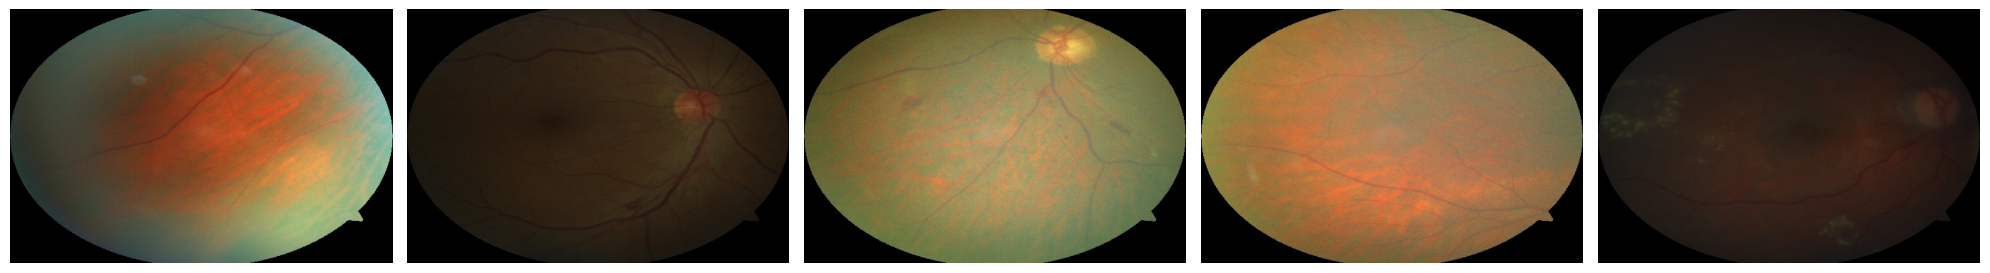

In [14]:
plotImages(sample_training_images[:5])

In [15]:
sample_lables

array([2., 2., 5., 5., 6., 0., 6., 4., 3., 2., 4., 4., 0., 0., 2., 4., 6.,
       6., 2., 2., 3., 0., 4., 4., 0., 5., 5., 0., 0., 5., 3., 6.],
      dtype=float32)

In [23]:
HIDDEN_DIM = 512
NUM_CLASSES = 5

In [25]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [26]:
class network(tf.keras.Model):
  def __init__(self, hidden_dim, num_classes, reg = tf.keras.regularizers.l2(0.0001)):
    super(network,self).__init__()

    self.cnn1 = tf.keras.layers.Conv2D(32, 4, 4, activation = 'relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.cnn2 = tf.keras.layers.Conv2D(64, 3, 2, activation='relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.cnn3 = tf.keras.layers.Conv2D(128, 3, 2, activation='relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.l1 = tf.keras.layers.Dense(hidden_dim,activation='relu',kernel_regularizer=reg, bias_regularizer=reg)
    
    self.l2 = tf.keras.layers.Dense(hidden_dim,activation = 'relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.l3 = tf.keras.layers.Dense(hidden_dim,activation = 'relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.out = tf.keras.layers.Dense(num_classes,kernel_regularizer=reg, activation='softmax', bias_regularizer=reg,)


  def call(self,obs):
    x = self.cnn1(obs)
    x = self.cnn2(x)
    fin_cnn_layer = self.cnn3(x)
    x = tf.keras.layers.Flatten()(fin_cnn_layer)
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    return self.out(x), fin_cnn_layer